In [1]:
import pandas as pd
from pandas import Series, DataFrame
%pylab inline

Populating the interactive namespace from numpy and matplotlib


---
### [Q1 12 points] Classification

Consider a dataset with two features, with the scatter plot of the data following a honeycomb pattern:
![honeycomb](honeycomb.png)

You should assume that
* each edge of the hexagons has equal length, and
* the picture extends thoughout the x-y plane and has infinite points.

The hexagonal lines are not important; they are just there to visualize the structure of the datapoints.

### [Q1a 3 points] What is the accuracy of a KNN classifier with K=3?

The accuracy of a KNN classifier with K=3 will be 0. This is because for each datapoint atleast the closest 2 points are opposite classification. When we take 3 nearest neighbors, for each point, atleast 2 of them will be of opposite classification. Hence, for all the points the classification will be wrong.

### [Q1b 3 points] What is the accuracy of KNN with K=7?

The accuracy of a KNN classifier with K=7 will be 0. This is because for each datapoint atleast the closest 4 points are opposite classification. When 4 out of 7 points are in opposite classification the point in considered will be classified as that of those points via KNN. The same applies to all the points. Hence, for all the points the classification will be wrong.

### [Q1c 3 points] What is the accuracy of the baseline classifier?

The baseline classification accuracy would be classifying all the points as one class. In that case, the prior of the class which has higher prior would be the accuracy. In this case, it would be 0.5 or 50%

---
Now consider the following two options:
![2 honeycombs](honeycomb2.png)

* In both options, the honeycomb extends in the vertical direction but not the horizontal direction.
* In both, you should assume that the points are really small, and at the corners of the hexagons. The figure shows the points as large circles just for ease of visualization.

Suppose you build a depth-10 decision tree to classify the red from blue points in each case.

### [Q1d 3 points] For which figure (a or b) can a depth-10 decision tree give a higher accuracy?

50 % accuracy with any number of trees for both the figures.

---
We will analyze a dataset of tax receipts for Wine/Liquor/Beer sales from a variety of locations in Texas.
We will need the following columns:
* Taxpayer Name, City, State, Zip refer to the name of the business entity that sells these products.
* Location Name, City, State, Zip refer to the name of the specific hotel/bar/business run by the business entity (Taxpayer Name). A Taxpayer Name may operate several business locations.
* Inside/Outside City Limits: This is "Y" if the business location is inside city limits, and "N" otherwise.
* TABC Permit Number is a license string.
* Liquor/Wine/Beer/CoverCharge Receipts: These are the sales numbers reported for tax purposes by the business.

### [Q2 2 points] Read in the file **BeverageReceipts.csv** and print its first line.

In [2]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline

df = pd.read_csv('BeverageReceipts.csv')

df.iloc[0]

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


Taxpayer Number                                32047970895
Taxpayer Name                 HONDURAS MAYA CAFE & BAR LLC
Taxpayer Address                             8011 HAZEN ST
Taxpayer City                                      HOUSTON
Taxpayer State                                          TX
Taxpayer Zip                                       77036.0
Taxpayer County                                        101
Location Number                                          1
Location Name                 HONDURAS MAYA CAFE & BAR LLC
Location Address                  5945 BELLAIRE BLVD STE B
Location City                                      HOUSTON
Location State                                          TX
Location Zip                                         77081
Location County                                        101
Inside/Outside City Limits                               Y
TABC Permit Number                                MB817033
Responsibility Begin Date                       08/16/20

### [Q3 4 points] Which Taxpayer Name shows up most frequently in the dataset?

In [5]:
df['Taxpayer Name'].value_counts().index[0]

'AMC ITD, LLC'

### [Q4 4 points] In what fraction of rows is the Taxpayer Name identical to the Location Name?

In [7]:
len(df[df['Taxpayer Name'] == df['Location Name']])/len(df)

0.08574

### [Q5 4 points] In what fraction of rows is the Location Name a substring of Taxpayer Name?

If both are equal, you can consider the Location Name to be a substring of Taxpayer Name.

In [9]:
def check(x):
    return str(x['Location Name']) in str(x['Taxpayer Name'])


len(df[df[['Location Name','Taxpayer Name']].apply(check, axis = 1)])/len(df)

0.21532

### [Q6 4 points] Plot the top-20 cities by frequency.

For each Taxpayer City, figure out how many rows are associated with that city.
Show a plot of the top 20 cities, with x-axis=city and y-axis=number of rows.

<AxesSubplot:>

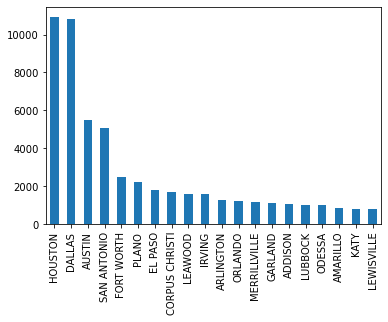

In [12]:
df['Taxpayer City'].value_counts()[:20].plot(kind = 'bar')

### [Q7 4 points] Is there a Taxpayer Name associated with more than 1 Taxpayer Numbers?

If so, print out such Taxpayer Name(s).

In [20]:
tax_pn = df[['Taxpayer Name','Taxpayer Number']].groupby('Taxpayer Name')['Taxpayer Number'].nunique()

tax_pn = tax_pn[tax_pn>1].index

df[df['Taxpayer Name'].isin(tax_pn) == True][['Taxpayer Name','Taxpayer Number']].drop_duplicates()

,Taxpayer Name,Taxpayer Number
798,JOSE T GARCIA,32044562612
22505,JOSE T GARCIA,32007933057


### [Q8 4 points] Plot the top 10 Taxpayer Names by the total amount of "Total Receipts".

* For each Taxpayer Name, add up all of their Total Receipts (call this the sumTotal for this Taxpayer Name).
* Plot the top 10 Names with the highest sumTotal, with x-axis being the Taxpayer Name and y-axis being their sumTotals.

Text(0, 0.5, 'sumTotals')

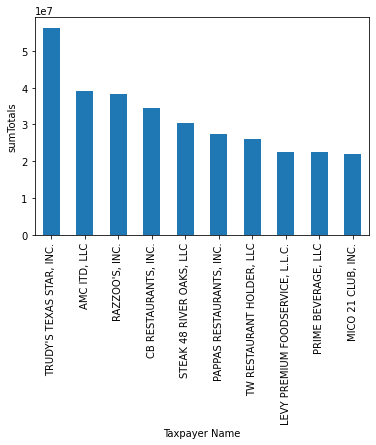

In [25]:
df.groupby('Taxpayer Name')['Total Receipts'].sum().sort_values(ascending = False)[:10].plot(kind = 'bar')
xlabel('Taxpayer Name')
ylabel('sumTotals')

### [Q9 4 points] In how many rows is the Total Receipts NOT equal to the sum of Liquor, Wine, Beer, and Cover Charge Receipts?

In [27]:
(df['Total Receipts'] != df['Liquor Receipts']+df['Wine Receipts']+df['Beer Receipts']+\
 df['Cover Charge Receipts']).sum()

147

### [Q10 4 points] Special Permit Numbers

* For each TABC Permit Number, consider its first two characters.
    * For example, for Permit Number="MB817033", this is "MB".
    * For Permit Number="N 837378", it is "N " (with the space).
* Figure out the number of unique permit numbers for each such 2-letter code.

In [32]:
df['Special Permit Number'] = df['TABC Permit Number'].map(lambda x: x[:2])
df.groupby('Special Permit Number')['TABC Permit Number'].nunique().sort_values(ascending = False)

Special Permit Number
MB    9653
RM    2358
N      592
NE     272
D      136
TB      45
NB      33
SL       4
FB       1
TN       1
Name: TABC Permit Number, dtype: int64

### [Q11 4 points] Top endings of Taxpayer Name

For each Taxpayer Name, find the last word; call it the "ending".

    * A word is anything without spaces, tabs, or other space-like characters.
    
Now, print the top 10 endings that show up most frequently (i.e., count the number of rows where the Taxpayer Name has this ending).

In [39]:
df['Ending'] = df['Taxpayer Name'].map(lambda x: x.rstrip('.').split()[len(x.split())-1])
df.groupby('Ending')['Taxpayer Name'].count().sort_values(ascending = False)[:10]

Ending
INC             35767
LLC             35255
L.L.C            3557
COMPANY          2637
LTD              2151
CORPORATION      1910
L.P              1680
CLUB             1653
LP               1304
INCORPORATED     1215
Name: Taxpayer Name, dtype: int64

### [Q12 6 points] Plot of mean "Total Receipts" by month

Show a plot where the x-axis is the month based on the "Responsibility Begin Date", and the y-axis is the average of the "Total Receipts" column over that month.

* The x-axis varies over all months starting from before 1994 until after 2021.

<AxesSubplot:xlabel='Responsibility Begin Date'>

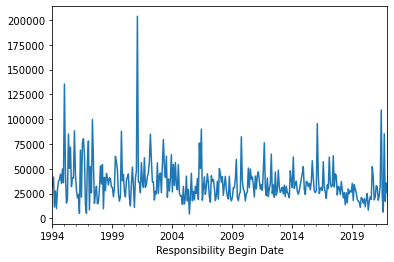

In [43]:
from datetime import datetime
df_dt = df.copy()
df_dt['Responsibility Begin Date'] = pd.to_datetime(df_dt['Responsibility Begin Date'])
df_dt.set_index('Responsibility Begin Date', inplace=True)

df_dt.loc['1994-01-01':'2021-12-31']['Total Receipts'].resample('M', kind='period').mean().plot()


### [Q13 6 points] Cities preferring one type of booze

For each Location City, do the following:
* Calculate the totals for Liquor, Wine, and Beer Receipts from that City.
* From these totals, figure out the highest and second-highest totals
    * For example, if a city has totals of 100K for Liquor, 200K for Wine, and 10K for Beer, then the highest total is 200K and the second-highest is 100K.
* Print out the cities where the highest total is greater than 50,000 AND the ratio of highest to second-highest is greater than 10.

These are the cities that specifically prefer one kind of booze.

In [71]:
x = df.groupby('Location City')[['Liquor Receipts','Wine Receipts','Beer Receipts']].sum()#.max()

first = x.T.max()

x['max'] = first
def rmax(x):
    if x['Liquor Receipts'] == x['max']:
        return x['Liquor Receipts']  0
    else if x['Wine Receipts'] == x['max']:
        return x['Wine Receipts'] = 0
    else:
        return x['Beer Receipts'] = 0
        
x.apply(rmax,axis = 1)

# find out second highest  

SyntaxError: invalid syntax (313853711.py, line 8)

### [Q14 6 points] What fraction of Location Zips are associated with 2 or more different Location Counties?

Look at every unique Location Zip. Figure out if it shows up with 2 or more unique Location Counties. Print out the fraction of Location Zips that are split across Counties.

In [76]:
(df.groupby('Location Zip')['Location County'].nunique()>1).sum()/len(df['Location Zip'].drop_duplicates())

0.05520361990950226

### [Q15 6 points] Boozed-up locations

Some Location Names contain the substring " STE " (with spaces). The STE refers to a "suite" in that building.

* Find all rows where the Location Name contains " STE "
    * e.g., Location Name = "5945 BELLAIRE BLVD STE B"
* Consider only the part of the Location Name that comes before the STE. Call this the LocationBase.
    * e.g., Location Base = "5945 BELLAIRE BLVD"
* For every unique (LocationBase, Location City) pair, count how many distinct Location Names are associated with that pair.
    * e.g., Suppose that for LocationBase="5945 BELLAIRE BLVD" in LocationCity="HOUSTON", there are two associated Location Names (say, "Honduras Maya" and "Pervian Inca"). Then, we say ("5495 BELLAIRE BLVD", "HOUSTON") has a count of 2.
* Print out all (LocationBase, Location City) pairs with a count greater than 10.

In [88]:
df_new = df[df['Location Address'].str.contains(pat = " STE ")].copy()

def lb(x):
    y = x.split()
    return ' '.join(y[0:y.index('STE')])

df_new['LocationBase'] = df_new['Location Address'].map(lb)

s = df_new.groupby(['LocationBase','Location City'])['Location Name'].nunique()

s[s>10]

LocationBase        Location City
2625 OLD DENTON RD  CARROLLTON       12
3011 GULDEN LN      DALLAS           13
Name: Location Name, dtype: int64

### [Q16 6 points] Top city for multi-city chains

Call a LOCATION NAME a multi-city chain if it is associated with 5 or more different Taxpayer Cities.
For each such multi-city chain, figure out which city has the highest sum of Total Receipts for that chain.
For example:
* Suppose LOCATION NAME="Honduras Maya" shows up in only 1 city (HOUSTON). Then, it isn't a multi-city chain.
* Suppose LOCATION NAME="WINGSTOP" shows up in 5 or more cities. Then figure out the sum of all Total Receipts ("sumTotal") paid by WINGSTOP for each of these cities, and report the city with the highest sumTotal.
    * For instance, if WINGSTOP paid 200K in HOUSTON, 100K in Austin, and 50K in DALLAS, then you will report HOUSTON for WINGSTOP.
    * Report the top city for each such multi-city chain.


*Note*: This is only an example. HOUSTON may not be the top city for Wingstop.

In [97]:
ln = df.groupby('Location Name')['Location City'].nunique()
ln = ln[ln >= 5].index
df[df['Location Name'].isin(ln)].groupby(['Location Name','Location City'])['Total Receipts'].sum()\
.unstack('Location City').fillna(0).T.idxmax()

Location Name
54TH STREET RESTAURANT & DRAFTHOUSE     SAN MARCOS
ABUELO'S BEVERAGE CORPORATION              ABILENE
ANOTHER BROKEN EGG CAFE                 SHENANDOAH
APPLEBEE'S NEIGHBORHOOD GRILL & BAR    WEATHERFORD
ASPEN CREEK                                 IRVING
                                          ...     
VILLA GRANDE MEXICAN RESTAURANT             HASLET
WILLIE'S GRILL & ICEHOUSE              SAN ANTONIO
WING DADDY'S SAUCE HOUSE               SAN ANTONIO
WINGSTOP                                   GARLAND
ZOE'S KITCHEN                                PLANO
Length: 85, dtype: object

### [Q17 6 points] Pattern of places being within city limits

* For each Location City, figure out the number of rows associated with that City ("numRows"), and the fraction of these rows where the 'Inside/Outside City Limits' columns equals 'Y' ("fracY").
* Split the Location Cities into 5 bins based on their "numRows". Each bin should have roughly the same number of Location Cities in it.
* For each bin, print out the average "fracY" for all Location Cities in that bin.

In [122]:
limit_y = df[df['Inside/Outside City Limits'] == 'Y'].groupby('Location City')['Location City'].count()
numRows = df['Location City'].value_counts()
numRows
df_city = pd.DataFrame(numRows, columns = ['numRows','fracY'])
df_city['numRows'] = numRows
df_city['fracY'] = fracY
df_city['nRbins'] = pd.qcut(df_city['numRows'], 5)
df_city.groupby('nRbins')['fracY'].mean()

nRbins
(0.999, 4.0]        0.595078
(4.0, 9.0]          0.688232
(9.0, 23.0]         0.710370
(23.0, 105.6]       0.797750
(105.6, 12206.0]    0.887873
Name: fracY, dtype: float64

### [Q18 6 points] Variety places

* For each row, figure out which one of Liquor/Wine/Booze Receipts "dominates" (i.e., its value is  greater than the other 2 receipts)
    * For example, if Liquor=100, Wine=50, Beer=0, then Liquor dominates
    * If Liquor=Beer=100 and Wine=10, then no one dominates
    * If Liquor=Wine=Beer=0, then no one dominates.
* Note that each Taxpayer Name can show up multiple times (i.e., multiple rows), each time with a different type of booze dominating the others.
* Figure out the Taxpayer Names for which there are at least 2 rows in which Liquor dominates, at least 2 rows in which Wine dominates, and at least 2 rows in which Beer dominates
* Report the fraction of unique Taxpayer Names for which this happens.

In [160]:
which_max = df[['Liquor Receipts','Wine Receipts','Beer Receipts']].T.idxmax()
maxi = df[['Liquor Receipts','Wine Receipts','Beer Receipts']].T.max()
df_18 = df.copy()
df_18['which_max'] = which_max
df_18['max'] = maxi

def clean(x):
    if x['max'] == 0:
        return 0
    elif x['Liquor Receipts'] == x['Wine Receipts'] == x['max']\
    or x['Beer Receipts'] == x['Wine Receipts'] == x['max']\
    or x['Beer Receipts'] == x['Liquor Receipts'] == x['max']:
        return 0
    else:
        return x['which_max']

df_18['which_max_clean'] = df_18.apply(clean, axis = 1)
df_trans = df_18[['Taxpayer Name','Liquor Receipts','Wine Receipts','Beer Receipts','which_max','max','which_max_clean']]\
.groupby(['Taxpayer Name','which_max_clean'])['Taxpayer Name'].count().unstack('which_max_clean').drop(columns = 0)\
.fillna(0)

def check_tn(x):
    if x['Liquor Receipts']>=2 and x['Wine Receipts']>=2 and x['Beer Receipts']>=2:
        return 1
    else:
        return 0
    

df_trans['check'] = df_trans.apply(check_tn,axis = 1)
len(df_trans[df_trans['check'] == 1].index)/len(df['Taxpayer Name'].drop_duplicates())
  

0.006206435596295235

---

### [Q19 8 points] Predictions for Cervical Cancer

Load in **cervical.csv**. Each row lists the details of one patient. 

* A patient is in the positive class ("has cancer") if any of the following four columns is greater than 0: Hinselmann/Schiller/Citology/Biopsy.

Set up the following classification problem:
* We want to predict if a patient is in the positive class using all features *except* the four columns named above.
* Split the data into 75% training and 25% testing set.
* Print out the test accuracy of the baseline classifier.
* Print out the test accuracy of a Gradient Boosting Regression classifier with 100 trees, each of depth 1.

In [167]:
df_c = pd.read_csv('cervical.csv')

def target(x):
    if x['Hinselmann'] > 0 or x['Schiller'] > 0 or x['Citology'] > 0 or x['Biopsy'] > 0:
        return 1
    else:
        return 0

df_c['target'] = df_c.apply(target, axis = 1)
df_c.iloc[0]

Age                                   18.0
Number of sexual partners              4.0
First sexual intercourse              15.0
Num of pregnancies                     1.0
Smokes                                 0.0
Smokes (years)                         0.0
Smokes (packs/year)                    0.0
Hormonal Contraceptives                0.0
Hormonal Contraceptives (years)        0.0
IUD                                    0.0
IUD (years)                            0.0
STDs                                   0.0
STDs (number)                          0.0
STDs:condylomatosis                    0.0
STDs:cervical condylomatosis           0.0
STDs:vaginal condylomatosis            0.0
STDs:vulvo-perineal condylomatosis     0.0
STDs:syphilis                          0.0
STDs:pelvic inflammatory disease       0.0
STDs:genital herpes                    0.0
STDs:molluscum contagiosum             0.0
STDs:AIDS                              0.0
STDs:HIV                               0.0
STDs:Hepati

In [177]:
df_c['target'].value_counts().max()/df_c['target'].value_counts().sum()
# Baseline accuracy

0.6666666666666666

In [178]:
x = df_c.columns.values[:-4]

formula = 'target ~ ' + ' + '.join(['Q("'+x+'")' \
                                    for x in df_c.columns.values[:-5]])
formula

'target ~ Q("Age") + Q("Number of sexual partners") + Q("First sexual intercourse") + Q("Num of pregnancies") + Q("Smokes") + Q("Smokes (years)") + Q("Smokes (packs/year)") + Q("Hormonal Contraceptives") + Q("Hormonal Contraceptives (years)") + Q("IUD") + Q("IUD (years)") + Q("STDs") + Q("STDs (number)") + Q("STDs:condylomatosis") + Q("STDs:cervical condylomatosis") + Q("STDs:vaginal condylomatosis") + Q("STDs:vulvo-perineal condylomatosis") + Q("STDs:syphilis") + Q("STDs:pelvic inflammatory disease") + Q("STDs:genital herpes") + Q("STDs:molluscum contagiosum") + Q("STDs:AIDS") + Q("STDs:HIV") + Q("STDs:Hepatitis B") + Q("STDs:HPV") + Q("STDs: Number of diagnosis") + Q("Dx:Cancer") + Q("Dx:CIN") + Q("Dx:HPV") + Q("Dx")'

In [184]:
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
from patsy import dmatrices
from sklearn.model_selection import train_test_split
from sklearn import metrics
Y, X = dmatrices(formula, df_c, return_type='dataframe')

y = Y['target'].values


X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=1)

model= GradientBoostingClassifier(n_estimators=100,
                               max_depth=1,
                               random_state=1)
model.fit(X_train,y_train)

accuracy_train = metrics.accuracy_score(y_train, model.predict(X_train))

accuracy_test = metrics.accuracy_score(y_test, model.predict(X_test))

print('Training accuracy:'+str(accuracy_train))
print('Test accuracy:'+str(accuracy_test))

Training accuracy:0.7251184834123223
Test accuracy:0.7605633802816901
